<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 30px;"> Working with large datasets using Dask </h1>

Dask is a powerful Python library designed to work with large datasets that are too big to fit into memory. It scales familiar Python libraries like pandas, NumPy, and scikit-learn to handle larger-than-memory computations efficiently.

#### Advantages : 
* Parallel Computing: Dask can execute operations in parallel across multiple cores or even across a cluster of machines.
* Out-of-Core Processing: Works efficiently with data that exceeds the memory limit by breaking computations into smaller, manageable chunks.
* Seamless Integration: Supports pandas, NumPy, scikit-learn, and other Python libraries, making it easy to scale existing workflows.
* Lazy Evaluation: Optimizes computations by building a task graph and executing it only when results are needed.

In [7]:
# pip install dask

In [17]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [19]:
# Load the dataset
dask_df = dd.read_csv('sales_data.csv')

<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;"> Task 1: Inspect the dataset

In [25]:
print(dask_df.head())
print(dask_df.dtypes)

   OrderID  CustomerID ProductID     Category  Quantity  Price        Date  \
0        1         101        P1  Electronics         2    500  2025-01-01   
1        2         102        P2     Clothing         1     50  2025-01-02   
2        3         103        P3    Furniture         1    700  2025-01-03   
3        4         101        P1  Electronics         1    500  2025-01-04   
4        5         104        P4     Clothing         3     40  2025-01-05   

          City  
0     New York  
1  Los Angeles  
2      Chicago  
3     New York  
4      Houston  
OrderID                 int64
CustomerID              int64
ProductID     string[pyarrow]
Category      string[pyarrow]
Quantity                int64
Price                   int64
Date          string[pyarrow]
City          string[pyarrow]
dtype: object


<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;">Task 2: Filter rows where Category is "Electronics" and Quantity > 2

In [29]:
filtered_df = dask_df[(dask_df['Category'] == 'Electronics') & (dask_df['Quantity'] > 2)]
print(filtered_df.head())


   OrderID  CustomerID ProductID     Category  Quantity  Price        Date  \
9       10         108        P8  Electronics         5    100  2025-01-10   

          City  
9  Los Angeles  


<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;"> Task 3: Compute Total Sales and group by City

In [35]:
dask_df['TotalSales']=dask_df['Quantity'] * dask_df['Price']
total_sales_by_city = dask_df.groupby('City')['TotalSales'].sum().compute()
print(total_sales_by_city)

City
Boston            900
Chicago          2300
Houston           120
Los Angeles       550
New York         1700
San Francisco     600
Name: TotalSales, dtype: int64


<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;">Task 4: Find the most popular category

In [37]:
total_quantity_by_category = dask_df.groupby('Category')['Quantity'].sum().compute()
most_popular_category = total_quantity_by_category.idxmax()
print(f"Most Popular Category: {most_popular_category}")

Most Popular Category: Electronics


<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;"> Task 5: Save the filtered data to a new CSV file

In [39]:
filtered_df.to_csv('filtered_electronics_sales.csv', single_file=True)

['C:\\Users\\USER\\Old folder\\75 days of challenge\\filtered_electronics_sales.csv']

<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;">Task 6: Count Orders by Category

In [41]:
orders_by_category = dask_df.groupby('Category')['OrderID'].count()
print(orders_by_category.compute())


Category
Clothing       3
Electronics    4
Furniture      3
Name: OrderID, dtype: int64


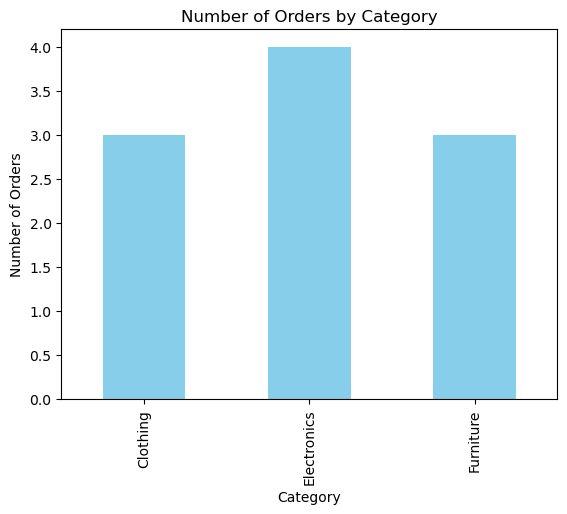

In [51]:
#Orders by Category (Bar Chart)
import matplotlib.pyplot as plt

# Compute the result
orders_by_category = dask_df.groupby('Category')['OrderID'].count().compute()

# Plot
orders_by_category.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;">Task 7: Find the City with the Highest Total Sales

In [43]:
total_sales_by_city = dask_df.groupby('City')['TotalSales'].sum()
highest_sales_city = total_sales_by_city.idxmax().compute()
print(f"City with the Highest Total Sales: {highest_sales_city}")


City with the Highest Total Sales: Chicago


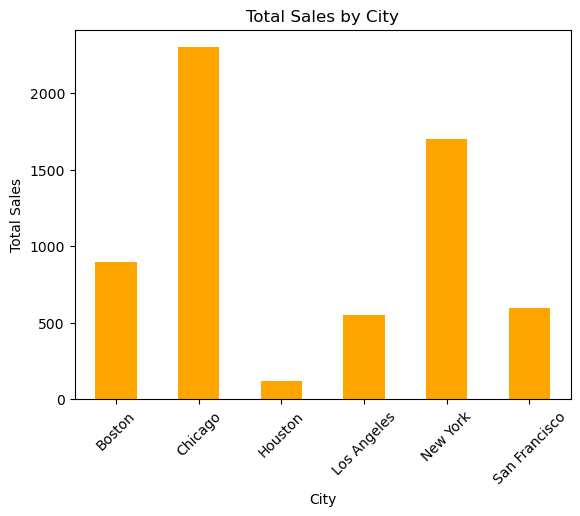

In [53]:
# Compute the result
total_sales_by_city = dask_df.groupby('City')['TotalSales'].sum().compute()

# Plot
total_sales_by_city.plot(kind='bar', color='orange')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;"> Task 8: Average Price per Product

In [45]:
avg_price_per_product = dask_df.groupby('ProductID')['Price'].mean()
top_5_products = avg_price_per_product.nlargest(5).compute()
print(top_5_products)


ProductID
P6    800.0
P3    700.0
P5    600.0
P1    500.0
P7    300.0
Name: Price, dtype: float64


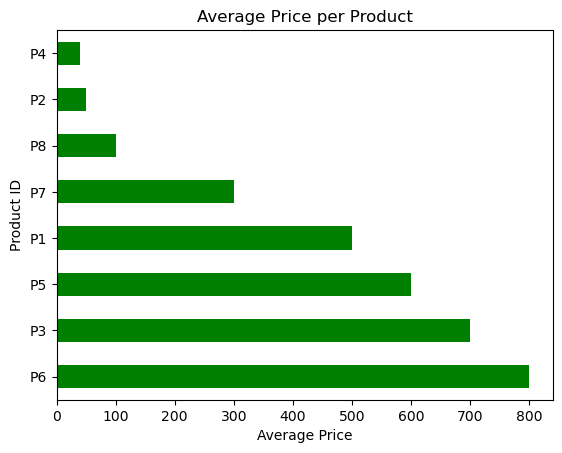

In [55]:
# Compute the result
avg_price_per_product = dask_df.groupby('ProductID')['Price'].mean().compute()

# Plot
avg_price_per_product.sort_values(ascending=False).plot(kind='barh', color='green')
plt.title('Average Price per Product')
plt.xlabel('Average Price')
plt.ylabel('Product ID')
plt.show()


<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;"> Task 9: Identify Repeat Customers

In [47]:
customer_order_count = dask_df.groupby('CustomerID')['OrderID'].count()
repeat_customers = customer_order_count[customer_order_count > 1].compute()
print(repeat_customers)


CustomerID
101    3
Name: OrderID, dtype: int64


<h1 style="text-align: center; color: blue; font-weight: bold; font-size: 20px;">Task 10: Monthly Sales Trend

In [49]:
dask_df['Month'] = dd.to_datetime(dask_df['Date']).dt.month
monthly_sales = dask_df.groupby('Month')['TotalSales'].sum()
print(monthly_sales.compute())


Month
1    6170
Name: TotalSales, dtype: int64
